In [1]:
import os
import glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Path

#### glob

In [2]:
data_paths = glob.glob('dataset/mnist_png/training/*/*.png')
data_paths[0]

'dataset/mnist_png/training/9/36655.png'

In [3]:
path = data_paths[0]
path

'dataset/mnist_png/training/9/36655.png'

#### tf.io.matching_files()

In [5]:
data_paths = tf.io.matching_files('dataset/mnist_png/training/*/*.png')
path = data_paths[0]
path

<tf.Tensor: shape=(), dtype=string, numpy=b'dataset/mnist_png/training/0/1.png'>

## Load Image (MNIST)

In [6]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)
print(image.shape)

(28, 28, 1)


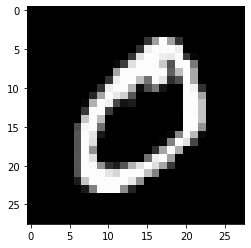

In [7]:
plt.imshow(image[:, :, 0], 'gray')
plt.show()

## Set Data Generator

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
datagen = ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip=True)

In [18]:
image = np.squeeze(image)
image.shape
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

In [19]:
transformed_image = next(iter(datagen.flow(image)))
transformed_image.shape

(1, 28, 28, 1)

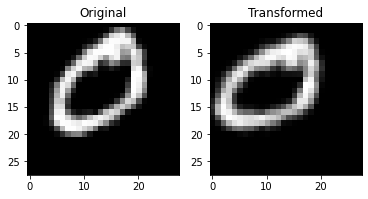

In [22]:
plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(image), 'gray')

plt.subplot(122)
plt.title('Transformed')
plt.imshow(np.squeeze(transformed_image), 'gray')

plt.show()

### Transformation (Augmentation)
* width_shift_range
* height_shift_range
* brightness_range
* zoom_range
* horizontal_flip
* vertical_flip
* rescale
* preprocessing_function (customize)

In [23]:
def read_image(data_path):
    gfile = tf.io.read_file(data_path)
    image = tf.io.decode_image(gfile)
    return image

#### required shape (batch, height, width, channel)

In [26]:
inputs = read_image(data_paths[5])
print(inputs.shape)
inputs = inputs[tf.newaxis, ...]
inputs.shape

(28, 28, 1)


TensorShape([1, 28, 28, 1])

In [27]:
datagen = ImageDataGenerator(
    width_shift_range=0.3
)

outputs = next(iter(datagen.flow(inputs)))
outputs.shape

(1, 28, 28, 1)

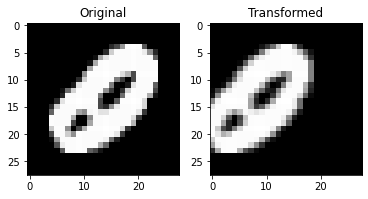

In [28]:
plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed')
plt.imshow(np.squeeze(outputs), 'gray')

plt.show()

### Train Dataset generator vs. Test Dataset generator
* Augmentation(Transformation) 같은 경우는 Train Dataset 에만 적용.
* Rescale (ex. normalization) 같은 경우는 Train, Test Dataset 둘다 적용 시켜야 함.

In [29]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7
    rescale=1./255.
)
test_datagen = ImageDataGenerator(rescale=1./255.)

SyntaxError: invalid syntax (<ipython-input-29-28e0111ee8cf>, line 3)